# Data cleaning

In [2]:
! jt -t monokai
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

'jt' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
df1 = pd.read_csv("pune_house_data.csv")
df1.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,size,total_sqft,bath,price,site_location
0,2 BHK,1056,2.0,39.07,Alandi Road
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk
2,3 BHK,1440,2.0,62.00,Anandnagar
3,3 BHK,1521,3.0,95.00,Aundh
4,2 BHK,1200,2.0,51.00,Aundh Road


In [7]:
df2.isnull().sum()

size             16
total_sqft        0
bath             73
price             0
site_location     1
dtype: int64

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

size             0
total_sqft       0
bath             0
price            0
site_location    0
dtype: int64

In [10]:
df3.shape

(13246, 5)

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) 
# Make new column called bhk and extract just the number into them.

<ipython-input-13-5622139e0abf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df3.head()

,size,total_sqft,bath,price,site_location,bhk
0,2 BHK,1056,2.0,39.07,Alandi Road,2
1,4 Bedroom,2600,5.0,120.00,Ambegaon Budruk,4
2,3 BHK,1440,2.0,62.00,Anandnagar,3
3,3 BHK,1521,3.0,95.00,Aundh,3
4,2 BHK,1200,2.0,51.00,Aundh Road,2


In [15]:
df3 = df3.drop(['size'], axis='columns')
df3.head()

,total_sqft,bath,price,site_location,bhk
0,1056,2.0,39.07,Alandi Road,2
1,2600,5.0,120.00,Ambegaon Budruk,4
2,1440,2.0,62.00,Anandnagar,3
3,1521,3.0,95.00,Aundh,3
4,1200,2.0,51.00,Aundh Road,2


In [16]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df3[df3['bhk']>20]

,total_sqft,bath,price,site_location,bhk
1718,8000,27.0,230.0,Uruli Devachi,27
4684,2400,40.0,660.0,Salunke Vihar,43


In [18]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df3[~df3['total_sqft'].apply(is_float)].head(10) # Get all those entries with range an an entry in 'total_sqft' column

,total_sqft,bath,price,site_location,bhk
30,2100 - 2850,4.0,186.000,Gultekdi,4
122,3067 - 8156,4.0,477.000,Ganeshkhind,4
137,1042 - 1105,2.0,54.005,Khadaki,2
165,1145 - 1340,2.0,43.490,Prabhat Road,2
188,1015 - 1540,2.0,56.800,Wakadewadi,2
410,34.46Sq. Meter,1.0,18.500,Ganeshkhind,1
549,1195 - 1440,2.0,63.770,Prabhat Road,2
648,4125Perch,9.0,265.000,Raviwar Peth,9
661,1120 - 1145,2.0,48.130,Tilak Road,2
672,3090 - 5002,4.0,445.000,Alandi Road,4


In [21]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num) # Apply the fuction
df4.head()

,total_sqft,bath,price,site_location,bhk
0,1056.0,2.0,39.07,Alandi Road,2
1,2600.0,5.0,120.00,Ambegaon Budruk,4
2,1440.0,2.0,62.00,Anandnagar,3
3,1521.0,3.0,95.00,Aundh,3
4,1200.0,2.0,51.00,Aundh Road,2


In [23]:
df4.loc[30]

total_sqft           2475
bath                    4
price                 186
site_location    Gultekdi
bhk                     4
Name: 30, dtype: object

# Feature Engineering

In [24]:
df5 = df4.copy()

In [25]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [26]:
df5.location = df5.site_location.apply(lambda x: x.strip())
location_stats = df5.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
location_stats

<ipython-input-26-330d348a48dd>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df5.location = df5.site_location.apply(lambda x: x.strip())


site_location
Alandi Road       139
Kasba Peth        139
Karve Nagar       139
Paud Road         139
Pirangut          139
                 ... 
Shukrawar Peth    136
Wakadewadi        136
Wanowrie          136
Vadgaon Budruk    134
other               1
Name: site_location, Length: 97, dtype: int64

In [27]:
len(location_stats[location_stats<=10])

1

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

site_location
other    1
Name: site_location, dtype: int64

In [29]:
len(df5.location.unique())

97

In [30]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

97

In [31]:
df5.head()

,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,51.00,Aundh Road,2,4250.000000


# Handling Outliers

In [32]:
df5.shape

(13246, 6)

In [33]:
df6 = df5[~(df5['total_sqft']/df5['bhk']<300)] # Remove entries whose sqft/bhk is less than 300
df6.head()

,total_sqft,bath,price,site_location,bhk,price_per_sqft
0,1056.0,2.0,39.07,Alandi Road,2,3699.810606
1,2600.0,5.0,120.00,Ambegaon Budruk,4,4615.384615
2,1440.0,2.0,62.00,Anandnagar,3,4305.555556
3,1521.0,3.0,95.00,Aundh,3,6245.890861
4,1200.0,2.0,51.00,Aundh Road,2,4250.000000


In [34]:
df6.shape

(12502, 6)

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.628922
std        4168.075333
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df): # Function to remove outliers for every location
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('site_location'):
        m = np.mean(subdf.price_per_sqft) # Calculate mean
        st = np.std(subdf.price_per_sqft) # Calculate SD
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

In [37]:
df7 = remove_pps_outliers(df6)
df7.shape

(10883, 6)

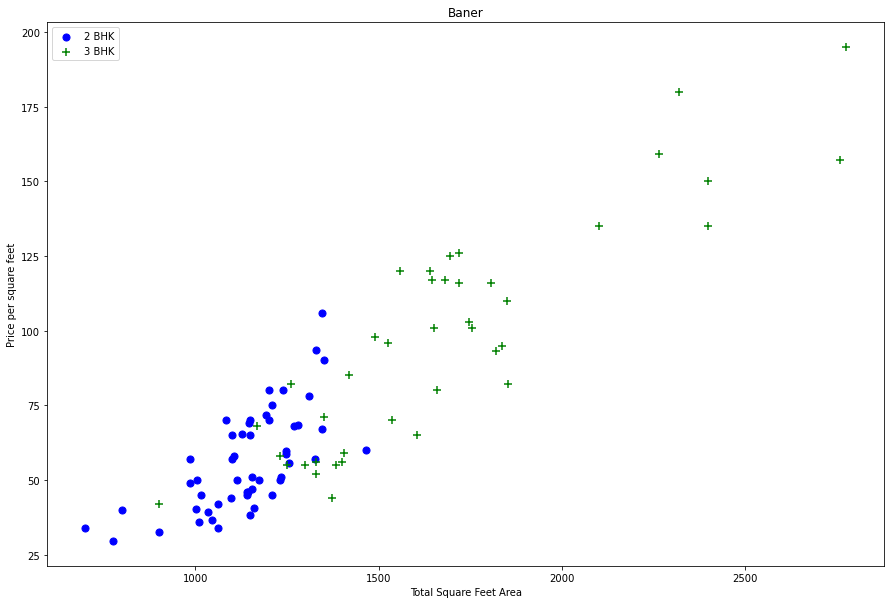

In [38]:
def plot_scatter_chart(df, site_location):
    bhk2 = df[(df.site_location==site_location) & (df.bhk==2)]
    bhk3 = df[(df.site_location==site_location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price per square feet')
    plt.title(site_location)
    plt.legend()
    
plot_scatter_chart(df7, "Baner") # An Example of the issue (Around 1500 sq.ft area)

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for site_location, site_location_df in df.groupby('site_location'):
        bhk_stats = {}
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7543, 6)

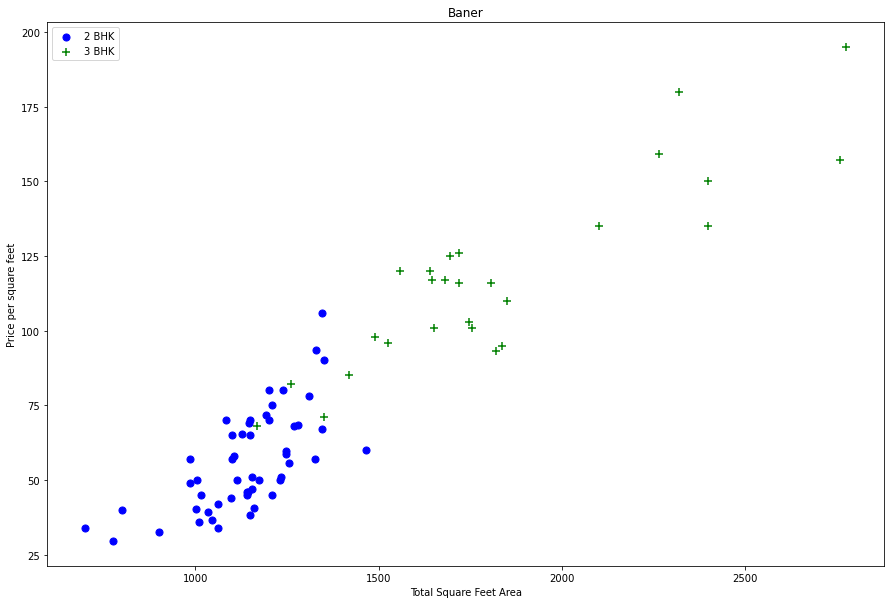

In [40]:
plot_scatter_chart(df8, "Baner")

Text(0, 0.5, 'Count')

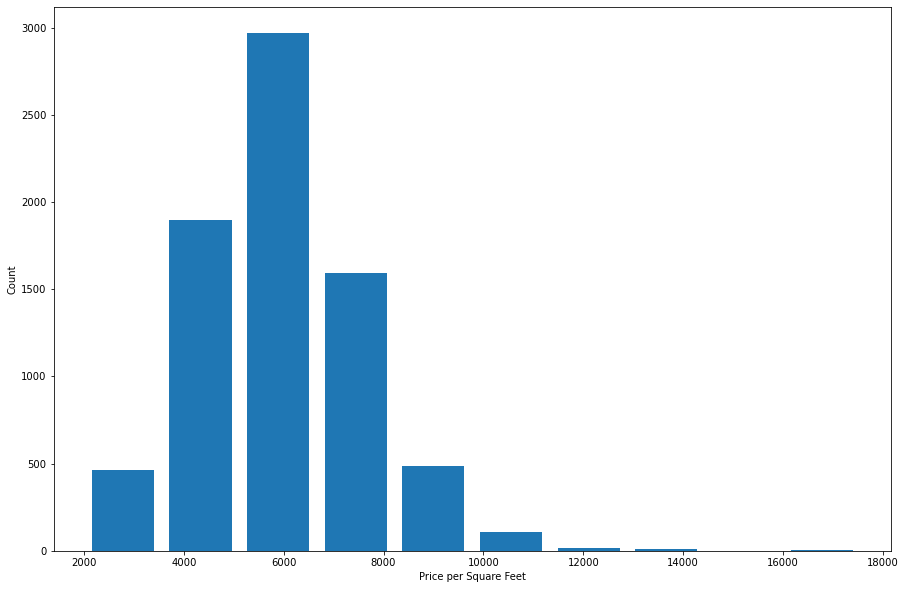

In [41]:
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

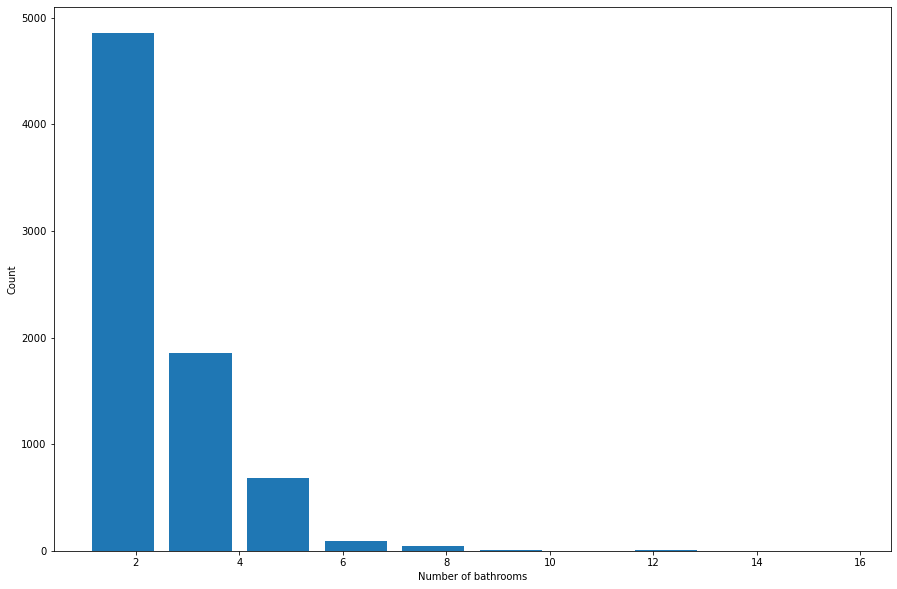

In [43]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [44]:
df8[df8.bath > df8.bhk+2]

,total_sqft,bath,price,site_location,bhk,price_per_sqft
772,1806.0,6.0,116.0,Baner,3,6423.034330
3067,11338.0,9.0,1000.0,Ghorpade Peth,6,8819.897689
4231,7000.0,8.0,450.0,Karve Nagar,4,6428.571429


In [45]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7479, 6)

In [46]:
df10 = df9.drop(['price_per_sqft'], axis='columns')
df10.head()

,total_sqft,bath,price,site_location,bhk
0,1056.0,2.0,39.07,Alandi Road,2
1,2894.0,4.0,245.00,Alandi Road,4
2,1084.0,2.0,50.00,Alandi Road,2
3,1230.0,2.0,80.00,Alandi Road,2
4,1750.0,3.0,130.00,Alandi Road,3


In [47]:
df10.shape

(7479, 5)

# Building Machine Learning Model

In [48]:
dummies = pd.get_dummies(df10.site_location)
dummies.head()

,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,Balaji Nagar,Baner,Baner road,Bhandarkar Road,Bhavani Peth,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df11 = pd.concat([df10, dummies.drop('Aundh', axis="columns")], axis='columns') # Append df10 and dummies dataframe
df11.head()

,total_sqft,bath,price,site_location,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh Road,Balaji Nagar,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,Alandi Road,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,Alandi Road,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,Alandi Road,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df12 = df11.drop('site_location', axis='columns')
df12.head()

,total_sqft,bath,price,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh Road,Balaji Nagar,Baner,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,39.07,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,245.00,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,50.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,80.00,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,130.00,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df12.shape

(7479, 99)

In [53]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh Road,Balaji Nagar,Baner,Baner road,...,Uruli Devachi,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada
0,1056.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2894.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1084.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1230.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1750.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y = df12.price
y.head()

0     39.07
1    245.00
2     50.00
3     80.00
4    130.00
Name: price, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [57]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression() # Linear Regression Model
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8234642712561886

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # ShuffleSplit will randomize the sample
cross_val_score(LinearRegression(), X,y, cv=cv)

array([0.87729294, 0.87158074, 0.82825079, 0.89763339, 0.81068616])

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

# Function that decides between the three most popular algorithms which are iterated through to find out which one gives the 
# best score
def find_best_model_using_gridsearch(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

find_best_model_using_gridsearch(X, y)

,model,best_score,best_params
0,linear_regression,0.857089,{'normalize': False}
1,lasso,0.857851,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.781357,"{'criterion': 'mse', 'splitter': 'random'}"


In [60]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lr_clf.predict([x])[0]

In [61]:
predict_price('Aundh Road', 1200, 2, 2)

75.88366890250752

In [62]:
predict_price('Ambegaon Budruk', 1200, 2, 2)

66.16237682293824

In [63]:
predict_price('Alandi Road', 1000, 2, 2)

52.65844611968859

In [64]:
import pickle
with open('Pune_House_Data.pickle', 'wb') as f:
    pickle.dump(lr_clf, f) 

In [65]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))
    